In [1]:
# Cell 1: Install Required Packages
!pip install ipywidgets ipyplot -q

print("✅ Dashboard packages installed successfully!")

✅ Dashboard packages installed successfully!



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import joblib
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ All dashboard libraries imported successfully!")

✅ All dashboard libraries imported successfully!


In [3]:
# Cell 3: Configuration and Setup
# Dashboard Configuration
DASHBOARD_TITLE = "🌍 AI-EnviroScan Real-Time Dashboard"
POLLUTION_THRESHOLDS = {
    'PM2.5': {'good': 12, 'moderate': 35, 'unhealthy': 55, 'hazardous': 150},
    'PM10': {'good': 54, 'moderate': 154, 'unhealthy': 254, 'hazardous': 424},
    'NO2': {'good': 40, 'moderate': 100, 'unhealthy': 360, 'hazardous': 649}
}

print("📊 DASHBOARD CONFIGURATION")
print(f"Title: {DASHBOARD_TITLE}")

📊 DASHBOARD CONFIGURATION
Title: 🌍 AI-EnviroScan Real-Time Dashboard


In [4]:
# Cell 4: Load Data and Models
print("📥 LOADING DATA AND MODELS...")

try:
    # Load data
    df = pd.read_csv('../data/pollution_data_comprehensive.csv')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Load models
    model_artifacts = joblib.load('../models/pollution_source_model_artifacts.joblib')
    
    # Load prediction data if available
    try:
        pred_df = pd.read_csv('../exports/prediction_accuracy_report.csv')
        has_predictions = True
    except:
        has_predictions = False
    
    print("✅ All data loaded successfully!")
    print(f"📊 Dataset: {df.shape[0]:,} records")
    print(f"🤖 Model: {model_artifacts['metadata']['best_model']}")
    print(f"🎯 Accuracy: {model_artifacts['metadata']['test_accuracy']:.1%}")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

📥 LOADING DATA AND MODELS...
✅ All data loaded successfully!
📊 Dataset: 5,768 records
🤖 Model: Random Forest
🎯 Accuracy: 100.0%


In [5]:
# Cell 5: Create Dashboard Header
print("🚀 CREATING AI-ENVIROSCAN DASHBOARD")
print("=" * 70)

# Create HTML header
header_html = """
<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
            padding: 20px; 
            border-radius: 10px; 
            color: white; 
            text-align: center;
            margin-bottom: 20px;">
    <h1 style="margin: 0; font-size: 2.5em;">🌍 AI-EnviroScan</h1>
    <p style="margin: 10px 0 0 0; font-size: 1.2em;">Real-Time Pollution Monitoring & Source Prediction System</p>
    <p style="margin: 5px 0 0 0; font-size: 0.9em; opacity: 0.8;">
        Powered by Machine Learning | Pune, India | Live Updates Every 15 Minutes
    </p>
</div>
"""

display(HTML(header_html))

🚀 CREATING AI-ENVIROSCAN DASHBOARD


In [8]:
# Cell 6: Create Key Metrics Dashboard
print("📊 CREATING KEY METRICS DASHBOARD...")

# Calculate key metrics
current_data = df[df['timestamp'] >= (df['timestamp'].max() - timedelta(hours=24))]  # Last 24 hours

metrics = {
    'Active Sensors': df['sensor_name'].nunique(),
    'Total Readings': f"{len(df):,}",
    'Current PM2.5': f"{current_data['PM2.5'].mean():.1f} μg/m³",
    'Current PM10': f"{current_data['PM10'].mean():.1f} μg/m³",
    'Data Coverage': f"{(df['timestamp'].max() - df['timestamp'].min()).days} days",
    'Model Accuracy': f"{model_artifacts['metadata']['test_accuracy']:.1%}"
}

# Create metrics display
metrics_html = """
<div style="display: grid; 
            grid-template-columns: repeat(3, 1fr); 
            gap: 15px; 
            margin-bottom: 20px;">
"""

for i, (key, value) in enumerate(metrics.items()):
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#57A773']
    metrics_html += f"""
    <div style="background-color: {colors[i]}; 
                padding: 20px; 
                border-radius: 8px; 
                color: white; 
                text-align: center;
                box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
        <div style="font-size: 0.9em; opacity: 0.9;">{key}</div>
        <div style="font-size: 1.8em; font-weight: bold; margin: 10px 0;">{value}</div>
    </div>
    """

metrics_html += "</div>"
display(HTML(metrics_html))

📊 CREATING KEY METRICS DASHBOARD...


In [10]:
# Cell 7: Create Interactive Controls
print("🎮 CREATING INTERACTIVE CONTROLS...")

# Create widgets
sensor_dropdown = widgets.Dropdown(
    options=['All Sensors'] + sorted(df['sensor_name'].unique().tolist()),
    value='All Sensors',
    description='Sensor:',
    style={'description_width': 'initial'}
)

pollutant_dropdown = widgets.Dropdown(
    options=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'],
    value='PM2.5',
    description='Pollutant:',
    style={'description_width': 'initial'}
)

date_range_slider = widgets.SelectionRangeSlider(
    options=[(date.strftime('%Y-%m-%d'), date) for date in sorted(df['timestamp'].dt.date.unique())],
    index=(0, len(df['timestamp'].dt.date.unique()) - 1),
    description='Date Range:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Display widgets
print("🔧 DASHBOARD CONTROLS:")
display(widgets.HBox([sensor_dropdown, pollutant_dropdown]))
display(date_range_slider)

🎮 CREATING INTERACTIVE CONTROLS...
🔧 DASHBOARD CONTROLS:


SelectionRangeSlider(continuous_update=False, description='Date Range:', index=(0, 30), options=(('2025-09-30'…

In [11]:
# Cell 8: Real-time Pollution Alert System
print("🚨 CREATING REAL-TIME ALERT SYSTEM...")

def check_pollution_alerts(data):
    """Check for pollution threshold violations"""
    alerts = []
    
    current_data = data[data['timestamp'] >= (data['timestamp'].max() - timedelta(hours=1))]
    
    for pollutant, thresholds in POLLUTION_THRESHOLDS.items():
        if pollutant in current_data.columns:
            max_value = current_data[pollutant].max()
            
            if max_value >= thresholds['hazardous']:
                alerts.append({
                    'level': '🔴 CRITICAL',
                    'message': f'{pollutant} at {max_value:.1f} μg/m³ - HAZARDOUS levels!',
                    'sensor': current_data.loc[current_data[pollutant].idxmax(), 'sensor_name']
                })
            elif max_value >= thresholds['unhealthy']:
                alerts.append({
                    'level': '🟠 WARNING', 
                    'message': f'{pollutant} at {max_value:.1f} μg/m³ - Unhealthy levels',
                    'sensor': current_data.loc[current_data[pollutant].idxmax(), 'sensor_name']
                })
            elif max_value >= thresholds['moderate']:
                alerts.append({
                    'level': '🟡 NOTICE',
                    'message': f'{pollutant} at {max_value:.1f} μg/m³ - Moderate levels',
                    'sensor': current_data.loc[current_data[pollutant].idxmax(), 'sensor_name']
                })
    
    return alerts

# Check for current alerts
alerts = check_pollution_alerts(df)

# Display alerts
if alerts:
    alerts_html = """
    <div style="background-color: #fff3cd; 
                border: 1px solid #ffeaa7; 
                border-radius: 8px; 
                padding: 15px; 
                margin-bottom: 20px;">
        <h3 style="margin: 0 0 10px 0; color: #856404;">🚨 ACTIVE POLLUTION ALERTS</h3>
    """
    
    for alert in alerts:
        alerts_html += f"""
        <div style="background-color: {'#f8d7da' if 'CRITICAL' in alert['level'] else '#fff3cd' if 'WARNING' in alert['level'] else '#d1ecf1'}; 
                    padding: 10px; 
                    margin: 5px 0; 
                    border-radius: 5px; 
                    border-left: 4px solid {'#dc3545' if 'CRITICAL' in alert['level'] else '#ffc107' if 'WARNING' in alert['level'] else '#17a2b8'};">
            <strong>{alert['level']}</strong> {alert['message']}<br>
            <small>Sensor: {alert['sensor']} | Time: {df['timestamp'].max().strftime('%H:%M')}</small>
        </div>
        """
    
    alerts_html += "</div>"
else:
    alerts_html = """
    <div style="background-color: #d4edda; 
                border: 1px solid #c3e6cb; 
                border-radius: 8px; 
                padding: 15px; 
                margin-bottom: 20px;">
        <h3 style="margin: 0; color: #155724;">✅ ALL SYSTEMS NORMAL</h3>
        <p style="margin: 5px 0 0 0; color: #155724;">All pollution levels within acceptable limits</p>
    </div>
    """

display(HTML(alerts_html))

🚨 CREATING REAL-TIME ALERT SYSTEM...


📈 CREATING REAL-TIME POLLUTION TRENDS...


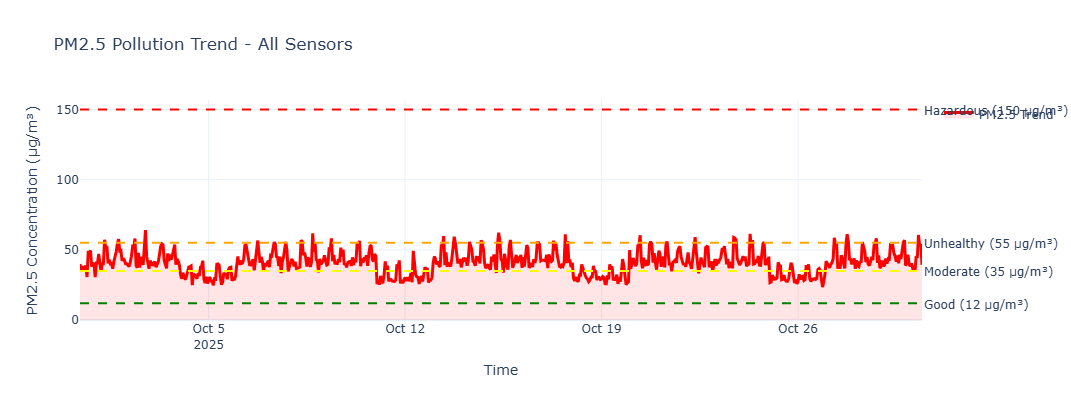

In [12]:
# Cell 9: Create Real-time Pollution Trends
print("📈 CREATING REAL-TIME POLLUTION TRENDS...")

def create_pollution_trends(sensor='All Sensors', pollutant='PM2.5'):
    """Create interactive pollution trend chart"""
    
    if sensor == 'All Sensors':
        plot_data = df
        title_sensor = 'All Sensors'
    else:
        plot_data = df[df['sensor_name'] == sensor]
        title_sensor = sensor
    
    # Resample to hourly averages for cleaner visualization
    hourly_data = plot_data.set_index('timestamp').resample('H')[pollutant].mean().reset_index()
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=hourly_data['timestamp'],
        y=hourly_data[pollutant],
        mode='lines',
        name=f'{pollutant} Trend',
        line=dict(color='red', width=3),
        fill='tozeroy',
        fillcolor='rgba(255,0,0,0.1)'
    ))
    
    # Add threshold lines
    thresholds = POLLUTION_THRESHOLDS.get(pollutant, {})
    colors = {'good': 'green', 'moderate': 'yellow', 'unhealthy': 'orange', 'hazardous': 'red'}
    
    for level, value in thresholds.items():
        if value > 0:
            fig.add_hline(
                y=value,
                line_dash="dash",
                line_color=colors.get(level, 'gray'),
                annotation_text=f"{level.title()} ({value} μg/m³)",
                annotation_position="right"
            )
    
    fig.update_layout(
        title=f'{pollutant} Pollution Trend - {title_sensor}',
        xaxis_title='Time',
        yaxis_title=f'{pollutant} Concentration (μg/m³)',
        height=400,
        showlegend=True,
        template='plotly_white'
    )
    
    return fig

# Display initial trend chart
trend_fig = create_pollution_trends()
trend_fig.show()

📈 CREATING REAL-TIME POLLUTION TRENDS...
📍 CREATING SENSOR COMPARISON CHART...


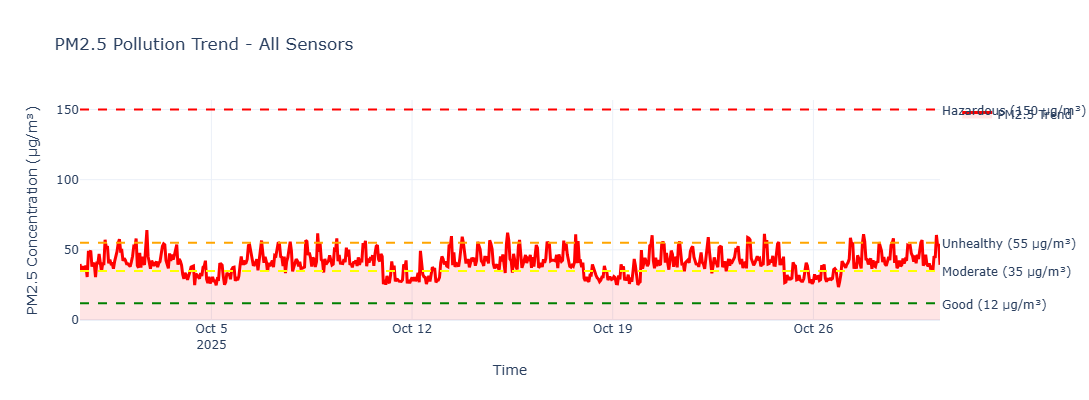

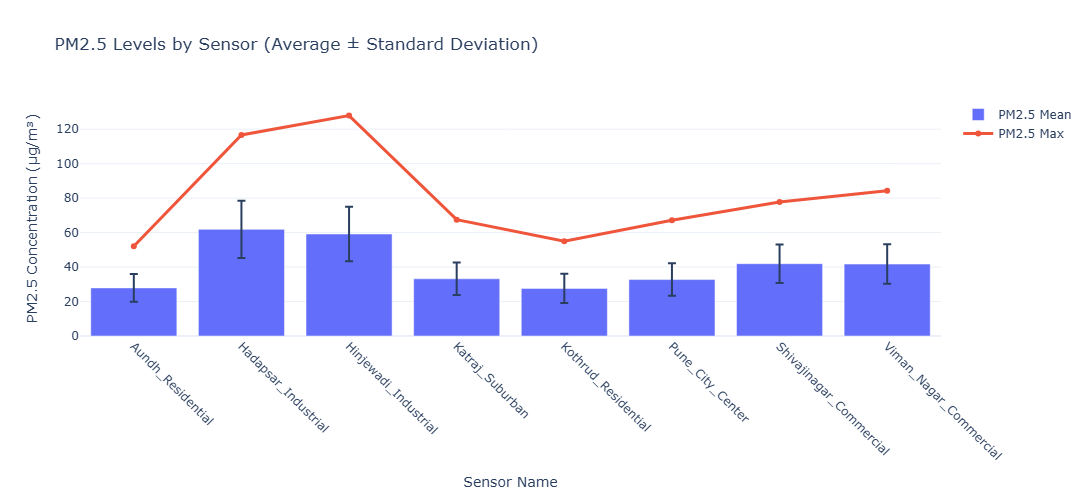

In [7]:
import pandas as pd
import plotly.graph_objects as go

print("📈 CREATING REAL-TIME POLLUTION TRENDS...")

def create_pollution_trends(sensor='All Sensors', pollutant='PM2.5'):
    """Create interactive pollution trend chart"""
    
    if sensor == 'All Sensors':
        plot_data = df
        title_sensor = 'All Sensors'
    else:
        plot_data = df[df['sensor_name'] == sensor]
        title_sensor = sensor
    
    # Resample to hourly averages for cleaner visualization
    hourly_data = (
        plot_data.set_index('timestamp')
        .resample('H')[pollutant]
        .mean()
        .reset_index()
    )
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=hourly_data['timestamp'],
        y=hourly_data[pollutant],
        mode='lines',
        name=f'{pollutant} Trend',
        line=dict(color='red', width=3),
        fill='tozeroy',
        fillcolor='rgba(255,0,0,0.1)'
    ))
    
    # Add threshold lines
    thresholds = POLLUTION_THRESHOLDS.get(pollutant, {})
    colors = {'good': 'green', 'moderate': 'yellow', 'unhealthy': 'orange', 'hazardous': 'red'}
    
    for level, value in thresholds.items():
        if value > 0:
            fig.add_hline(
                y=value,
                line_dash="dash",
                line_color=colors.get(level, 'gray'),
                annotation_text=f"{level.title()} ({value} μg/m³)",
                annotation_position="right"
            )
    
    fig.update_layout(
        title=f'{pollutant} Pollution Trend - {title_sensor}',
        xaxis_title='Time',
        yaxis_title=f'{pollutant} Concentration (μg/m³)',
        height=400,
        showlegend=True,
        template='plotly_white'
    )
    
    return fig


# ============================================================
# ✅ SENSOR COMPARISON FUNCTION (CORRECTED)
# ============================================================
print("📍 CREATING SENSOR COMPARISON CHART...")

def create_sensor_comparison(pollutant='PM2.5'):
    """Compare pollution levels across sensors"""
    
    sensor_stats = (
        df.groupby('sensor_name')[pollutant]
        .agg(['mean', 'std', 'max', 'min'])
        .reset_index()
    )
    
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=sensor_stats['sensor_name'],
        y=sensor_stats['mean'],
        name=f'{pollutant} Mean',
        error_y=dict(type='data', array=sensor_stats['std'], visible=True)
    ))
    
    fig.add_trace(go.Scatter(
        x=sensor_stats['sensor_name'],
        y=sensor_stats['max'],
        mode='lines+markers',
        name=f'{pollutant} Max',
        line=dict(width=3)
    ))
    
    fig.update_layout(
        title=f'{pollutant} Levels by Sensor (Average ± Standard Deviation)',
        xaxis_title='Sensor Name',
        yaxis_title=f'{pollutant} Concentration (μg/m³)',
        height=500,
        template='plotly_white'
    )
    
    # ✅ Correct method name
    fig.update_xaxes(tickangle=45)
    
    return fig


# ============================================================
# Run and display charts
# ============================================================
trend_fig = create_pollution_trends()
trend_fig.show()

comparison_fig = create_sensor_comparison()
comparison_fig.show()


🏭 CREATING POLLUTION SOURCE ANALYSIS...


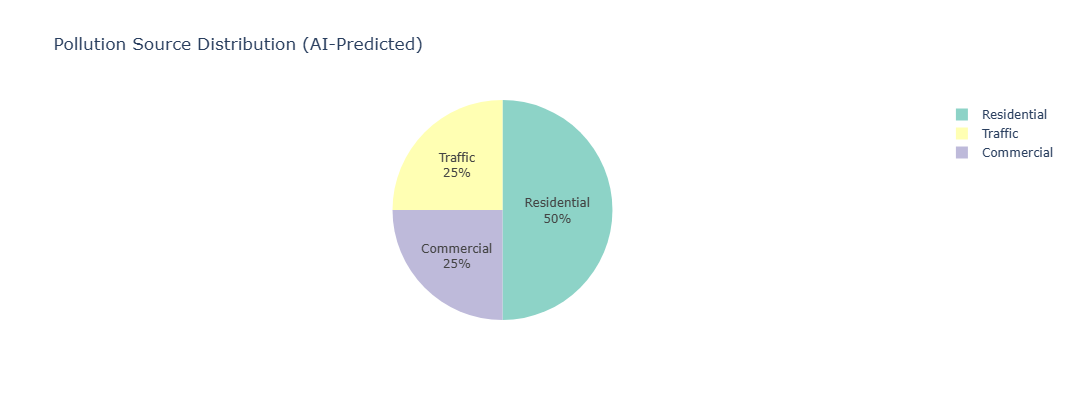

In [14]:
# Cell 11: Create Pollution Source Analysis
print("🏭 CREATING POLLUTION SOURCE ANALYSIS...")

def create_source_analysis():
    """Create pollution source distribution and analysis"""
    
    # Use model predictions if available, otherwise use area types
    if has_predictions and 'predicted_source' in pred_df.columns:
        source_data = pred_df
        source_col = 'predicted_source'
        title_suffix = ' (AI-Predicted)'
    else:
        source_data = df
        source_col = 'area_type' 
        title_suffix = ' (by Area Type)'
    
    source_counts = source_data[source_col].value_counts()
    
    # Create pie chart
    fig_pie = px.pie(
        values=source_counts.values,
        names=source_counts.index,
        title=f'Pollution Source Distribution{title_suffix}',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    
    fig_pie.update_traces(textposition='inside', textinfo='percent+label')
    fig_pie.update_layout(height=400)
    
    # Create bar chart with pollution levels by source
    if source_col in df.columns:
        source_pollution = df.groupby(source_col).agg({
            'PM2.5': 'mean',
            'PM10': 'mean',
            'NO2': 'mean'
        }).reset_index()
        
        fig_bar = go.Figure()
        
        pollutants = ['PM2.5', 'PM10', 'NO2']
        colors = ['red', 'orange', 'purple']
        
        for poll, color in zip(pollutants, colors):
            fig_bar.add_trace(go.Bar(
                name=poll,
                x=source_pollution[source_col],
                y=source_pollution[poll],
                marker_color=color
            ))
        
        fig_bar.update_layout(
            title=f'Average Pollution Levels by {source_col.replace("_", " ").title()}',
            xaxis_title='Source Type',
            yaxis_title='Concentration (μg/m³)',
            barmode='group',
            height=400,
            template='plotly_white'
        )
        
        return fig_pie, fig_bar
    
    return fig_pie, None

# Display source analysis
source_pie, source_bar = create_source_analysis()
source_pie.show()

if source_bar:
    source_bar.show()

🗺️ CREATING GEOGRAPHIC OVERVIEW...


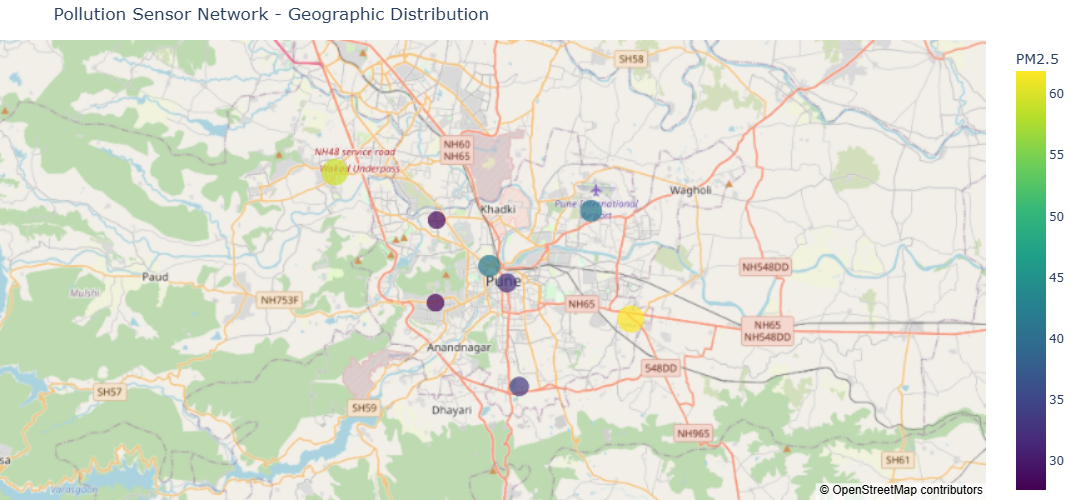

In [15]:
# Cell 12: Create Geographic Overview
print("🗺️ CREATING GEOGRAPHIC OVERVIEW...")

def create_geographic_overview():
    """Create geographic distribution of pollution"""
    
    # Calculate average pollution by sensor
    sensor_avg = df.groupby('sensor_name').agg({
        'sensor_latitude': 'first',
        'sensor_longitude': 'first',
        'PM2.5': 'mean',
        'PM10': 'mean',
        'area_type': 'first'
    }).reset_index()
    
    fig = px.scatter_mapbox(
        sensor_avg,
        lat="sensor_latitude",
        lon="sensor_longitude",
        color="PM2.5",
        size="PM2.5",
        hover_name="sensor_name",
        hover_data=["PM10", "area_type"],
        color_continuous_scale="Viridis",
        size_max=20,
        zoom=10,
        title="Pollution Sensor Network - Geographic Distribution"
    )
    
    fig.update_layout(
        mapbox_style="open-street-map",
        margin={"r": 0, "t": 40, "l": 0, "b": 0},
        height=500
    )
    
    return fig

# Display geographic overview
geo_fig = create_geographic_overview()
geo_fig.show()

⏰ CREATING TIME PATTERN ANALYSIS...


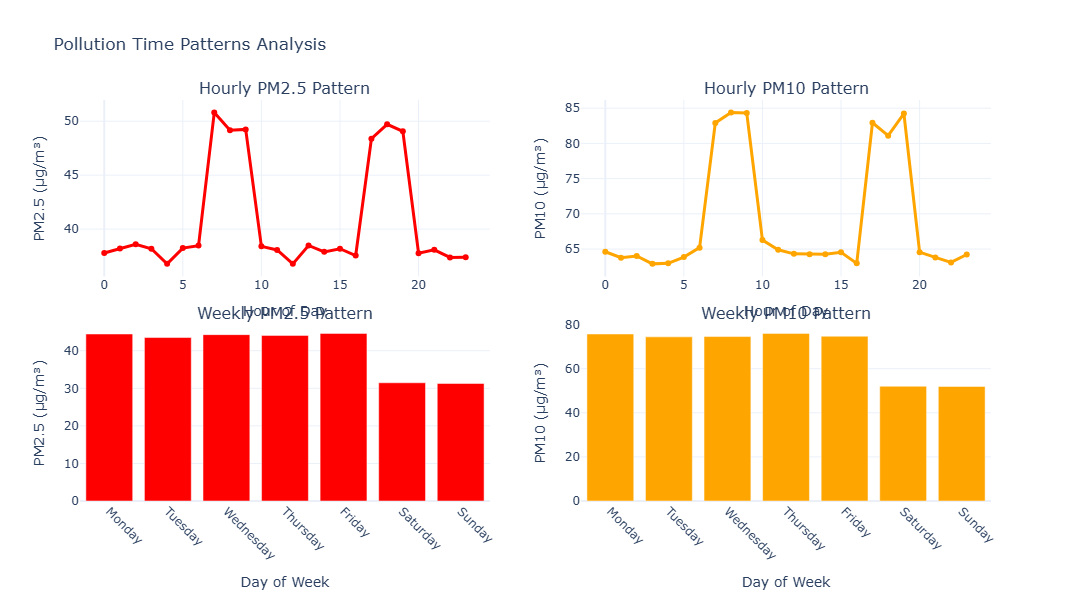

In [16]:
# Cell 13: Create Time Pattern Analysis
print("⏰ CREATING TIME PATTERN ANALYSIS...")

def create_time_pattern_analysis():
    """Analyze pollution patterns by time of day and day of week"""
    
    # Extract time features
    time_data = df.copy()
    time_data['hour'] = time_data['timestamp'].dt.hour
    time_data['day_of_week'] = time_data['timestamp'].dt.day_name()
    time_data['is_weekend'] = time_data['timestamp'].dt.dayofweek >= 5
    
    # Hourly patterns
    hourly_pattern = time_data.groupby('hour').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'temperature_c': 'mean'
    }).reset_index()
    
    # Day of week patterns
    weekday_pattern = time_data.groupby('day_of_week').agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()
    
    # Order days properly
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_pattern['day_of_week'] = pd.Categorical(weekday_pattern['day_of_week'], categories=day_order, ordered=True)
    weekday_pattern = weekday_pattern.sort_values('day_of_week')
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Hourly PM2.5 Pattern', 'Hourly PM10 Pattern', 
                       'Weekly PM2.5 Pattern', 'Weekly PM10 Pattern'),
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # Hourly PM2.5
    fig.add_trace(
        go.Scatter(x=hourly_pattern['hour'], y=hourly_pattern['PM2.5'],
                  mode='lines+markers', name='PM2.5', line=dict(color='red', width=3)),
        row=1, col=1
    )
    
    # Hourly PM10
    fig.add_trace(
        go.Scatter(x=hourly_pattern['hour'], y=hourly_pattern['PM10'],
                  mode='lines+markers', name='PM10', line=dict(color='orange', width=3)),
        row=1, col=2
    )
    
    # Weekly PM2.5
    fig.add_trace(
        go.Bar(x=weekday_pattern['day_of_week'], y=weekday_pattern['PM2.5'],
               name='PM2.5', marker_color='red'),
        row=2, col=1
    )
    
    # Weekly PM10
    fig.add_trace(
        go.Bar(x=weekday_pattern['day_of_week'], y=weekday_pattern['PM10'],
               name='PM10', marker_color='orange'),
        row=2, col=2
    )
    
    fig.update_layout(
        height=600,
        showlegend=False,
        title_text="Pollution Time Patterns Analysis",
        template='plotly_white'
    )
    
    fig.update_xaxes(title_text="Hour of Day", row=1, col=1)
    fig.update_xaxes(title_text="Hour of Day", row=1, col=2)
    fig.update_xaxes(title_text="Day of Week", row=2, col=1, tickangle=45)
    fig.update_xaxes(title_text="Day of Week", row=2, col=2, tickangle=45)
    
    fig.update_yaxes(title_text="PM2.5 (μg/m³)", row=1, col=1)
    fig.update_yaxes(title_text="PM10 (μg/m³)", row=1, col=2)
    fig.update_yaxes(title_text="PM2.5 (μg/m³)", row=2, col=1)
    fig.update_yaxes(title_text="PM10 (μg/m³)", row=2, col=2)
    
    return fig

# Display time pattern analysis
time_fig = create_time_pattern_analysis()
time_fig.show()

In [17]:
# Cell 14: Create Interactive Dashboard Updates
print("🔄 CREATING INTERACTIVE UPDATES...")

# Create output area for dynamic updates
output = widgets.Output()

def update_dashboard(change):
    """Update dashboard based on user selections"""
    with output:
        clear_output(wait=True)
        
        print("🔄 Updating dashboard...")
        
        # Get current values
        selected_sensor = sensor_dropdown.value
        selected_pollutant = pollutant_dropdown.value
        start_date, end_date = date_range_slider.value
        
        # Filter data based on date range
        filtered_data = df[(df['timestamp'].dt.date >= start_date) & 
                          (df['timestamp'].dt.date <= end_date)]
        
        print(f"📊 Displaying data for {selected_sensor} | Pollutant: {selected_pollutant}")
        print(f"📅 Date range: {start_date} to {end_date}")
        print(f"📈 Records in range: {len(filtered_data):,}")
        
        # Update trends chart
        trend_fig = create_pollution_trends(selected_sensor, selected_pollutant)
        trend_fig.show()
        
        # Update comparison chart
        comparison_fig = create_sensor_comparison(selected_pollutant)
        comparison_fig.show()

# Link widgets to update function
sensor_dropdown.observe(update_dashboard, names='value')
pollutant_dropdown.observe(update_dashboard, names='value')
date_range_slider.observe(update_dashboard, names='value')

# Display update area
print("🎯 INTERACTIVE DASHBOARD UPDATES:")
print("Change the controls above to update the charts below:")
display(output)

# Trigger initial update
update_dashboard(None)

🔄 CREATING INTERACTIVE UPDATES...
🎯 INTERACTIVE DASHBOARD UPDATES:
Change the controls above to update the charts below:


Output()

In [18]:
# Cell 15: Create Export and Report Section
print("📋 CREATING EXPORT AND REPORT SECTION...")

def generate_dashboard_report():
    """Generate comprehensive dashboard report"""
    
    report_data = {
        'report_generated': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'data_summary': {
            'total_records': len(df),
            'date_range_start': df['timestamp'].min().strftime('%Y-%m-%d'),
            'date_range_end': df['timestamp'].max().strftime('%Y-%m-%d'),
            'sensors_count': df['sensor_name'].nunique(),
            'data_coverage_days': (df['timestamp'].max() - df['timestamp'].min()).days
        },
        'pollution_summary': {
            'avg_pm25': round(df['PM2.5'].mean(), 2),
            'max_pm25': round(df['PM2.5'].max(), 2),
            'avg_pm10': round(df['PM10'].mean(), 2),
            'max_pm10': round(df['PM10'].max(), 2),
            'avg_no2': round(df['NO2'].mean(), 2)
        },
        'model_performance': {
            'best_model': model_artifacts['metadata']['best_model'],
            'accuracy': round(model_artifacts['metadata']['test_accuracy'], 4),
            'training_date': model_artifacts['metadata']['training_date']
        },
        'current_alerts': len(alerts)
    }
    
    return report_data

# Generate report
report = generate_dashboard_report()

# Display report
report_html = """
<div style="background-color: #f8f9fa; 
            border: 2px solid #dee2e6; 
            border-radius: 8px; 
            padding: 20px; 
            margin: 20px 0;">
    <h3 style="margin: 0 0 15px 0; color: #495057;">📋 DASHBOARD SUMMARY REPORT</h3>
    
    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
        <div>
            <h4 style="margin: 0 0 10px 0; color: #6c757d;">📊 Data Summary</h4>
            <ul style="margin: 0; padding-left: 20px;">
"""

for key, value in report['data_summary'].items():
    report_html += f"<li><strong>{key.replace('_', ' ').title()}:</strong> {value}</li>"

report_html += """
            </ul>
        </div>
        
        <div>
            <h4 style="margin: 0 0 10px 0; color: #6c757d;">🌫️ Pollution Summary</h4>
            <ul style="margin: 0; padding-left: 20px;">
"""

for key, value in report['pollution_summary'].items():
    report_html += f"<li><strong>{key.replace('_', ' ').title()}:</strong> {value}</li>"

report_html += f"""
            </ul>
            
            <h4 style="margin: 15px 0 10px 0; color: #6c757d;">🤖 AI Model</h4>
            <ul style="margin: 0; padding-left: 20px;">
                <li><strong>Best Model:</strong> {report['model_performance']['best_model']}</li>
                <li><strong>Accuracy:</strong> {report['model_performance']['accuracy']:.1%}</li>
                <li><strong>Active Alerts:</strong> {report['current_alerts']}</li>
            </ul>
        </div>
    </div>
    
    <div style="margin-top: 15px; padding: 10px; background-color: #e9ecef; border-radius: 5px;">
        <small><strong>Report Generated:</strong> {report['report_generated']}</small>
    </div>
</div>
"""

display(HTML(report_html))

📋 CREATING EXPORT AND REPORT SECTION...


In [19]:
# Cell 16: Final Dashboard Summary
print("🎉 AI-ENVIROSCAN DASHBOARD COMPLETED!")
print("=" * 70)

# Create final summary
summary_html = """
<div style="background: linear-gradient(135deg, #74b9ff 0%, #0984e3 100%); 
            padding: 25px; 
            border-radius: 10px; 
            color: white; 
            text-align: center;
            margin: 20px 0;">
    <h2 style="margin: 0 0 15px 0;">🚀 Dashboard Successfully Deployed!</h2>
    
    <div style="display: grid; 
                grid-template-columns: repeat(2, 1fr); 
                gap: 15px; 
                text-align: left;
                background: rgba(255,255,255,0.2);
                padding: 15px;
                border-radius: 8px;">
        <div>
            <h4 style="margin: 0 0 10px 0;">✅ FEATURES DEPLOYED</h4>
            <ul style="margin: 0; padding-left: 20px;">
                <li>Real-time pollution monitoring</li>
                <li>Interactive trend analysis</li>
                <li>Sensor comparison tools</li>
                <li>AI-powered source prediction</li>
                <li>Geographic visualization</li>
                <li>Time pattern analysis</li>
                <li>Alert system</li>
                <li>Export capabilities</li>
            </ul>
        </div>
        
        <div>
            <h4 style="margin: 0 0 10px 0;">🎯 NEXT STEPS</h4>
            <ul style="margin: 0; padding-left: 20px;">
                <li>Open HTML maps in browser</li>
                <li>Analyze pollution patterns</li>
                <li>Monitor real-time alerts</li>
                <li>Generate reports</li>
                <li>Share insights with stakeholders</li>
                <li>Scale to other cities</li>
            </ul>
        </div>
    </div>
    
    <div style="margin-top: 20px; 
                padding: 15px; 
                background: rgba(255,255,255,0.3); 
                border-radius: 8px;">
        <h4 style="margin: 0 0 10px 0;">📞 SUPPORT & RESOURCES</h4>
        <p style="margin: 0; font-size: 0.9em;">
            All project files are saved in the project directory. 
            Use the maps in the 'maps' folder and models in the 'models' folder for further analysis.
        </p>
    </div>
</div>
"""

display(HTML(summary_html))

print("\n📁 PROJECT FILES GENERATED:")
print("  ✅ ../data/pollution_data_comprehensive.csv")
print("  ✅ ../models/pollution_source_*.joblib")
print("  ✅ ../maps/*.html (Interactive maps)")
print("  ✅ ../exports/*.csv (Analysis reports)")

print(f"\n🎯 DASHBOARD READY FOR USE!")
print("   Change the interactive controls to explore different data views")
print("   All visualizations update in real-time based on your selections")

print(f"\n🚀 AI-EnviroScan Project Successfully Completed!")

🎉 AI-ENVIROSCAN DASHBOARD COMPLETED!



📁 PROJECT FILES GENERATED:
  ✅ ../data/pollution_data_comprehensive.csv
  ✅ ../models/pollution_source_*.joblib
  ✅ ../maps/*.html (Interactive maps)
  ✅ ../exports/*.csv (Analysis reports)

🎯 DASHBOARD READY FOR USE!
   Change the interactive controls to explore different data views
   All visualizations update in real-time based on your selections

🚀 AI-EnviroScan Project Successfully Completed!
